# Find correlations with price:
* rooms_number
* open_fire
* terrace
* terrace_area

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
from pandas.api.types import infer_dtype
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../csv_files/cleaned_properties (original).csv', index_col = 0)

In [4]:
df.columns

Index(['locality', 'house_is', 'property_subtype', 'price', 'sale',
       'rooms_number', 'area', 'kitchen_has', 'furnished', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'land_surface',
       'land_plot_surface', 'facades_number', 'swimming_pool_has',
       'building_state', 'region'],
      dtype='object')

# Divide dataframe into numerical, boolean and categorical variables

In [5]:
df_numerical = df[['price', 'area', 'terrace_area', 'garden_area', 'land_surface', 'land_plot_surface']]
df_boolean = df[['price', 'open_fire', 'terrace', 'house_is',
         'swimming_pool_has', 'kitchen_has', 'furnished', 'garden']]
df_categorical = df[['price', 'property_subtype', 'facades_number', 'building_state', 'rooms_number']]

# Categorical

In [6]:
print(df_categorical.info())

print(df_categorical.apply(infer_dtype))

uniques = pd.DataFrame()
for col in df_categorical:
    col_uniques = pd.DataFrame({f'{col}_value': df_categorical[f'{col}'].value_counts().index,
                                f'{col}_count': df_categorical[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

uniques.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51305 entries, 0 to 51304
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51305 non-null  float64
 1   property_subtype  51305 non-null  object 
 2   facades_number    40098 non-null  float64
 3   building_state    51305 non-null  object 
 4   rooms_number      51095 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.3+ MB
None
price               floating
property_subtype      string
facades_number      floating
building_state        string
rooms_number        floating
dtype: object


,price_value,price_count,property_subtype_value,property_subtype_count,facades_number_value,facades_number_count,building_state_value,building_state_count,rooms_number_value,rooms_number_count
0,1.0,1522,HOUSE,15158.0,0.0,17138.0,Not specified,26186.0,3.0,15467.0
1,295000.0,592,APARTMENT,10047.0,2.0,10184.0,AS_NEW,11031.0,2.0,12756.0
2,2.0,571,apartment,3624.0,4.0,7085.0,GOOD,7654.0,4.0,8251.0
3,199000.0,567,house,3562.0,3.0,5449.0,TO_BE_DONE_UP,2049.0,5.0,4171.0
4,275000.0,555,VILLA,3247.0,1.0,239.0,TO_RENOVATE,1777.0,1.0,3826.0
5,299000.0,555,APARTMENT_BLOCK,1909.0,10.0,2.0,JUST_RENOVATED,1617.0,6.0,2333.0
6,249000.0,554,MIXED_USE_BUILDING,1708.0,6.0,1.0,old,475.0,0.0,1197.0
7,225000.0,532,Apartment,1279.0,NaN,NaN,New,393.0,7.0,1125.0
8,395000.0,516,DUPLEX,900.0,NaN,NaN,TO_RESTORE,123.0,8.0,667.0
9,325000.0,455,PENTHOUSE,865.0,NaN,NaN,NaN,NaN,9.0,465.0


## property_subtype edits

In [7]:
# Change subtype to all smallcaps
df_categorical['property_subtype'] = df_categorical['property_subtype'].str.lower()

# Change - to underscore
df_categorical['property_subtype'].replace('-', '_', inplace = True)

/home/philippe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/philippe/.local/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## building state edits

In [8]:
df_categorical['building_state'].replace('TO_BE_DONE_UP', 'TO_RENOVATE', inplace = True)
df_categorical['building_state'].replace('TO_RESTORE', 'TO_RENOVATE', inplace = True)

## Find which column correlates most

### for semantic categories

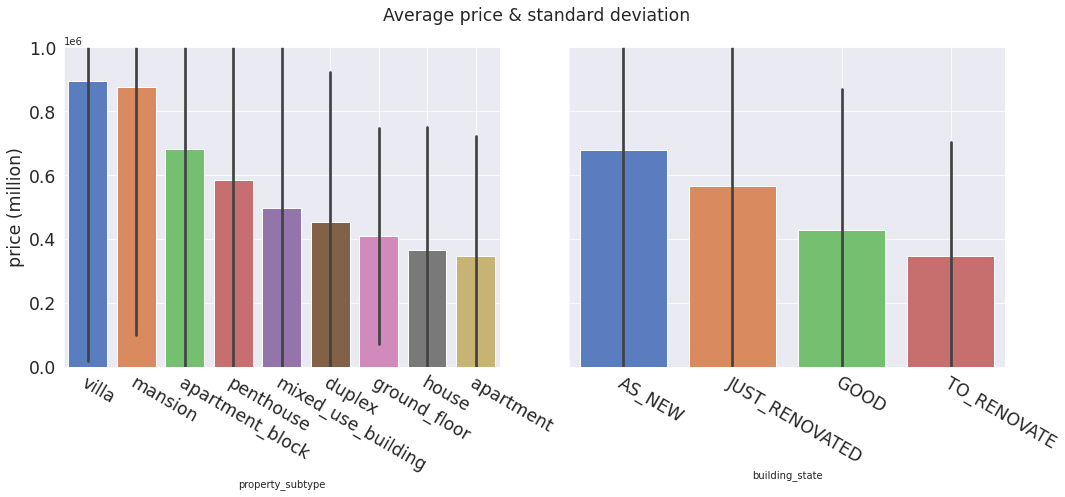

In [21]:
fig1, axes = plt.subplots(1, 2, sharey = True, figsize=(15,7))

sns.barplot(x='property_subtype', y='price',
            order = ['villa', 'mansion', 'apartment_block', 'penthouse',
                     'mixed_use_building', 'duplex', 'ground_floor',
                     'house', 'apartment',], data=df_categorical,
            palette="muted", ax=axes[0], ci = 'sd')
sns.barplot(x='building_state', y='price',
              order = ['AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_RENOVATE'],
              data=df_categorical, palette="muted",
              ax=axes[1], ci = 'sd')

for ax in axes:
    ax.grid(True)
    ax.set_ylabel('')
    ax.tick_params(axis='x', which='major', labelsize = 'xx-large')
    ax.tick_params(axis='y', which='major', labelsize = 'xx-large')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")

axes[0].axis([None, None, 0, 1000000])
axes[0].set_ylabel('price (million)', fontsize = 'xx-large')

fig1.suptitle('Average price & standard deviation', fontsize='xx-large')
     
plt.tight_layout()

plt.savefig("./pictures/property_subtype_building_cor.png", transparent=True)

plt.show()

### for numeric categories

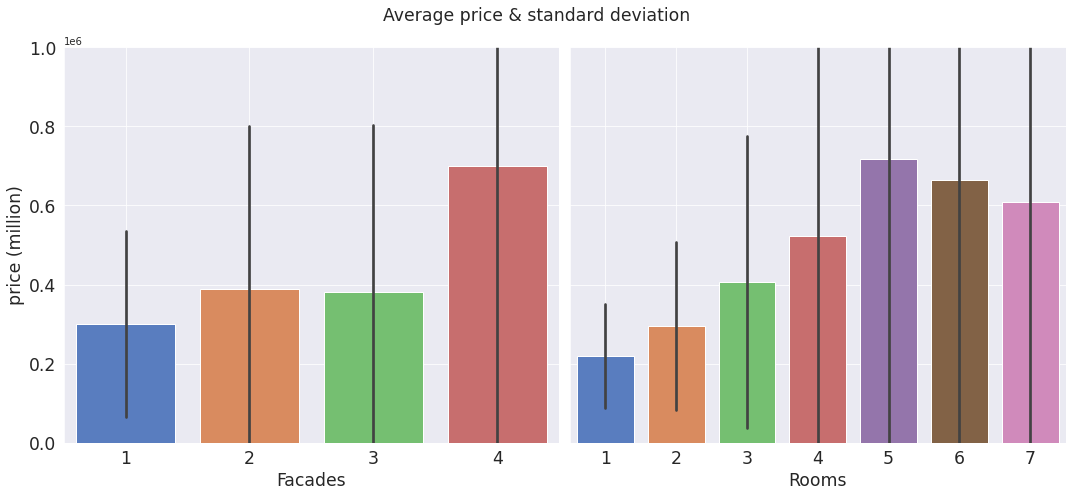

In [20]:
fig1, axes = plt.subplots(1, 2, sharey = True, figsize=(15,7))

sns.barplot(x='facades_number', y='price',
               data=df_categorical, palette="muted",
               ax=axes[0], ci = 'sd', order = [1, 2, 3, 4])
sns.barplot(x='rooms_number', y='price',
               data=df_categorical, palette="muted",
               ax=axes[1], ci = 'sd', order = [1, 2, 3, 4, 5, 6, 7])

for ax in axes:
    ax.grid(True)
    ax.set_ylabel('')
    ax.tick_params(axis='x', which='major', labelsize = 'xx-large')
    ax.tick_params(axis='y', which='major', labelsize = 'xx-large')

axes[0].axis([None, None, 0, 1000000])
axes[0].set_ylabel('price (million)', fontsize = 'xx-large')

axes[0].set_xlabel('Facades', fontsize = 'xx-large')
axes[1].set_xlabel('Rooms', fontsize = 'xx-large')

fig1.suptitle('Average price & standard deviation', fontsize='xx-large')
     
plt.tight_layout()

plt.savefig("./pictures/facades_rooms_cor.png", transparent=True)

plt.show()

# Numerical:
## Find which column correlates most

/home/philippe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


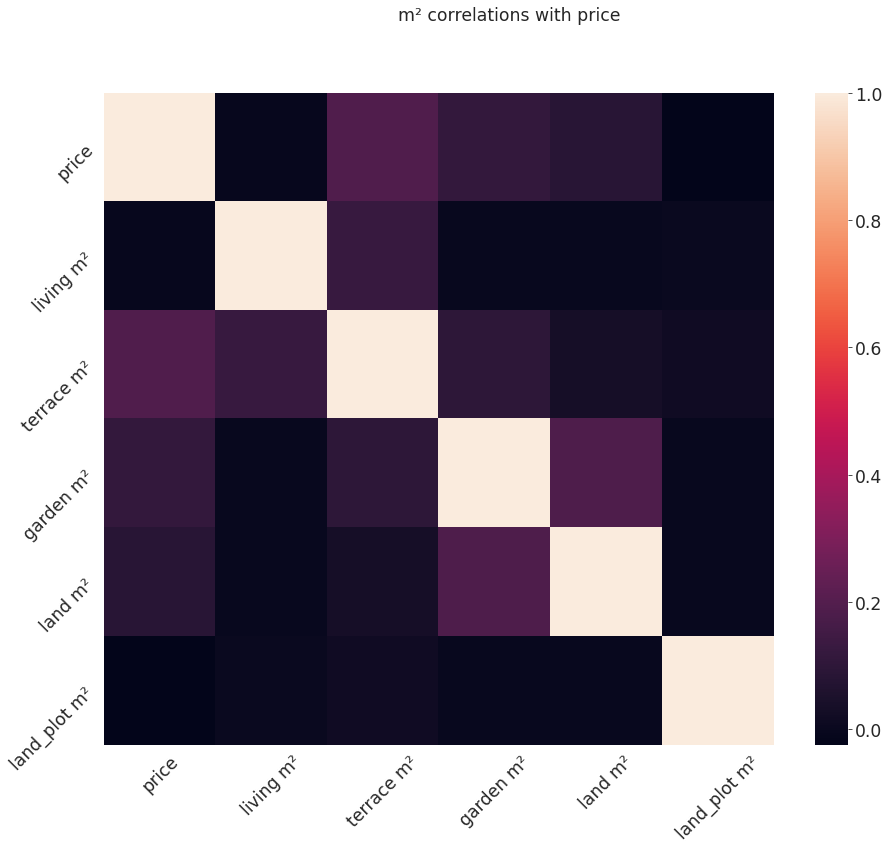

In [19]:
labels = ['price', 'living m²', 'terrace m²', 'garden m²', 'land m²', 'land_plot m²']
corr = df_numerical.corr()
 
# Heatmap
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(corr, xticklabels = labels, yticklabels = labels)
#ax.tick_params(axis='both', which='major', labelsize = 'xx-large')
ax.figure.axes[-2].set_xticklabels(labels, rotation = 45, fontsize = 'xx-large')
ax.figure.axes[-2].set_yticklabels(labels, rotation = 45, fontsize = 'xx-large')
ax.figure.axes[-1].set_yticklabels(ax.figure.axes[-1].get_yticklabels(), fontsize = 'xx-large')

fig.suptitle('m² correlations with price', fontsize='xx-large')

plt.savefig("./pictures/area_cor.png", transparent=True)

# Boolean
## Make contents a display friendly Yes/No


In [12]:
# change garden values >1 to Yes
df_boolean['garden'].apply(lambda x: 1 if x > 1 else x)

# change 0.0 to No, 1.0 to Yes and unknown to NaN
df_boolean_without_price = df_boolean.iloc[:,1:]
df_boolean_without_price = df_boolean_without_price.replace({'unknown': np.nan, 0: 'No', 1: 'Yes', 'False': 'No', 'True': 'Yes'})
df_boolean = pd.concat([df_boolean['price'], df_boolean_without_price], axis = 1)


## Melt the dataframe

In [13]:
df_boolean_melted = df_boolean.melt(id_vars = ['price'], value_vars = ['open_fire', 'terrace', 'house_is', 'swimming_pool_has', 'kitchen_has', 'furnished', 'garden'])
df_boolean_melted.head()

,price,variable,value
0,295000.0,open_fire,No
1,675000.0,open_fire,No
2,250000.0,open_fire,No
3,545000.0,open_fire,No
4,500000.0,open_fire,No


## Find which columns correlates most with price

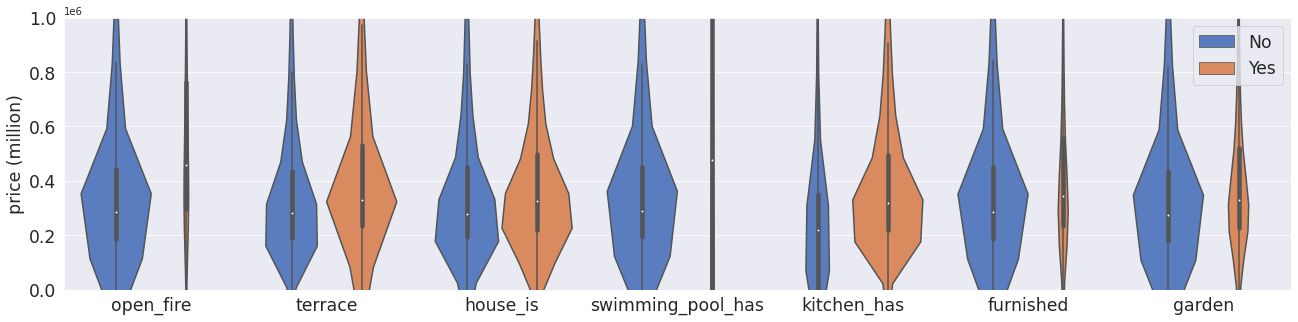

In [18]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(22,5))

ax = sns.violinplot(x="variable", y="price", hue="value",
                    data=df_boolean_melted, palette="muted",
                   inner = 'box', scale = 'count', hue_order = ['No', 'Yes'])

ax.set_ylabel('price (million)', fontsize = 'xx-large')
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize = 'xx-large')
ax.axis([None, None, 0, 1000000])
ax.grid(axis = 'y')
ax.legend(loc = 'upper right', fontsize = 'xx-large')

plt.savefig('./pictures/boolean_cor.png', transparent=True)
plt.show()

## Find which columns correlate most with price (alternative)
### this one loses track of the relative sizes of the categories (terrace area should be smaller because it is less tracked)

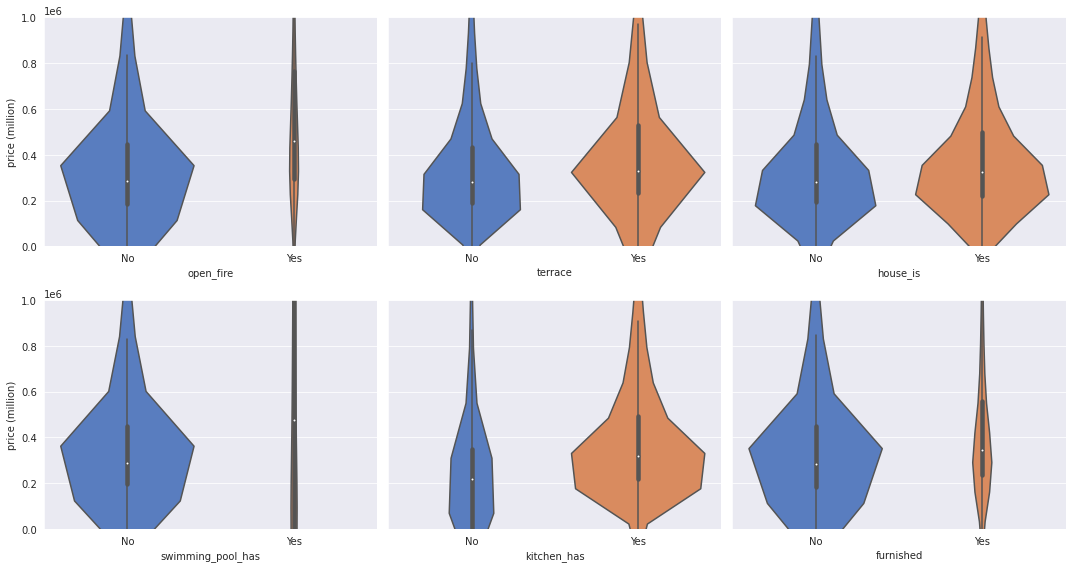

In [15]:
fig1, (row1, row2) = plt.subplots(2, 3, sharey = True, figsize=(15,8))

sns.violinplot(x='open_fire', y='price',
               data=df_boolean, inner = 'box', palette="muted",
               scale = 'count', order = ['No', 'Yes'], ax=row1[0])
sns.violinplot(x='terrace', y='price',
               data=df_boolean, inner = 'box', palette="muted",
               scale = 'count', order = ['No', 'Yes'], ax=row1[1])
sns.violinplot(x='house_is', y='price',
               data=df_boolean, inner = 'box', palette="muted",
               scale = 'count', order = ['No', 'Yes'], ax=row1[2])
sns.violinplot(x='swimming_pool_has', y='price',
               data=df_boolean, inner = 'box', palette="muted",
               scale = 'count', order = ['No', 'Yes'], ax=row2[0])
sns.violinplot(x='kitchen_has', y='price',
               data=df_boolean, inner = 'box', palette="muted",
               scale = 'count', order = ['No', 'Yes'], ax=row2[1])
sns.violinplot(x='furnished', y='price',
               data=df_boolean, inner = 'box', palette="muted",
               scale = 'count', order = ['No', 'Yes'], ax=row2[2])

for row in (row1, row2):
    for ax in row:
        ax.grid(True)
        ax.set_ylabel('')

row1[0].axis([None, None, 0, 1000000])
row1[0].set_ylabel('price (million)')
row2[0].set_ylabel('price (million)')
     
plt.tight_layout()

plt.show()